Initializing the notebook:

In [1]:
import os
from functions import *

# Get the directory where the current script is located
script_directory = os.getcwd()

# Change the current working directory to the script's directory
os.chdir(script_directory)

# Now the CWD is the same as the script's directory
print("New Current Working Directory:", os.getcwd())

New Current Working Directory: /Users/behradmoadeli/Documents/PhD/behrads_papers/reports


# System Model

Initially, only the equation for one state (temperature or concentration) will be considered. For simplicity, the domain will be $[0,1]$, with Danckwerts boundary conditions:

$$\left\{\begin{array}{l} \dot{x} = D\partial_{\zeta\zeta} x -v\partial_{\zeta} x +kx\\
D\partial_\zeta x(0,t)-vx(0,t)=-v[Rx(1,t-\tau)+(1-R)u(t-\tau_I)] \\
\partial_\zeta x(1,t)=0 \\
y(t)=x(1,t-\tau_O)
  \end{array}\right. $$

This model considers that the input is applied in the reactor's entrance, which is mixed with the recycle from the outlet. Input, output, and state delays are considered and represented by $\tau_I,\tau_O$, and $\tau$, respectively. 

## Eigenvalue Analysis

The eigenvalue problem, defined as $A\Phi(\zeta,\lambda)=\lambda\Phi(\zeta,\lambda)$, will result in the following system of equation for this system:

$$\left\{\begin{array}{l} \lambda\phi = D\partial_{\zeta\zeta} \phi -v\partial_{\zeta} \phi +k\phi\\
\lambda\phi_D=\dfrac{1}{\tau}\partial_{\zeta}\phi_D\\
D\partial_\zeta \phi(0)-v\phi(0)=-Rv\phi_D(0) \\
\partial_\zeta \phi(1)=0 \\
\phi_D(1)=\phi(1)\\
  \end{array}\right. $$

where $\Phi=[\phi,\,\phi_D]^T$, with $\phi$ as the state eigenfunction and $\phi_D$ as the eigenfunction related to the delay. By defining $X=[\phi,\, \partial_{\zeta}\phi,\,\phi_D]^T$, the following system of ODEs is obtained:

$$
\left\{\begin{array}{l}\partial_{\zeta}X=\begin{bmatrix} 0 & 1 & 0\\ \dfrac{\lambda-k}{D} & \dfrac{v}{D} & 0\\0 & 0 & \tau\lambda\end{bmatrix}X=ΛX \\
DX_2(0)-vX_1(0)=-RvX_3(0) \\
X_2(1)=0 \\
X_3(1)=X_1(1)\\ \end{array}\right.
$$

## Characteristic Equation

This is a system of first order ODE's, and the solution to such systems is given by:

$$ X(\zeta, \lambda) = e^{\Lambda \zeta} X (\zeta=0, \lambda) \\ \overset{\zeta = 1}{\Rightarrow} X(1, \lambda) = e^{\Lambda} X (\zeta=0) $$

Now, let's assume:

$$ e^{\Lambda} = Q(\lambda) = \begin{bmatrix} 
        q_{1} & q_{2} & q_{3} \\ q_{4} & q_{5} & q_{6} \\ q_{7} & q_{8} & q_{9}
    \end{bmatrix} $$


Thus, we may write:

$$\left\{\begin{array}{l}
X_1(1) = q_1 X_1(0) + q_2 X_2(0) + q_3 X_3(0) \\
X_2(1) = q_4 X_1(0) + q_5 X_2(0) + q_6 X_3(0) \\
X_3(1) = q_7 X_1(0) + q_8 X_2(0) + q_9 X_3(0)
\end{array}\right.$$

Now, we may go ahead and put the above expressions into boundary conditions to get the following:

$$\left\{\begin{array}{l}
Dx_2-vx_1=-Rvx_3 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
q_7 x_1 + q_8 x_2 + q_9 x_3 = q_1 x_1 + q_2 x_2 + q_3 x_3
\end{array}\right. \Rightarrow \left\{\begin{array}{l}
-vx_1 + Dx_2 + Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 + q_6 x_3 = 0 \\
(q_1 - q_7) x_1 + (q_2 - q_8) x_2 + (q_3 - q_9) x_3 = 0
\end{array}\right.$$


where $x_i$ is the same as $X_i(0)$.

For this particular case, we know that:

$$ q_{3} = q_{6} = q_{7} = q_{8} = 0 $$

This will further simplify the above system of equions into the following system:

$$\left\{\begin{array}{l}
-vx_1 + Dx_2 + Rvx_3 = 0 \\
q_4 x_1 + q_5 x_2 = 0 \\
q_1 x_1 + q_2 x_2 - q_9 x_3 = 0
\end{array}\right.$$

This is a $3 \times 3$ system of algebraic equations in the form of $\bar{A} \bar{x} = 0 $, with:

$$ \bar{A} = \begin{bmatrix}
-v & D & Rv \\
q_4 & q_5 & 0 \\
q_1 & q_2 & -q_9
\end{bmatrix}; \quad \bar{x} = \begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix} $$

In [2]:
# Can be improved with symbolic determinant calculation

 For such a system to have non-trivial solution (i.e. $\bar{x} \neq 0$), the dimension of the nullspace of the coefficients matrix $\bar{A}$ needs to be non-zero. This will happen if and only if the coefficients matrix $\bar{A}$ is rank-deficient. One way to make sure matrix $ \bar{A} $ is not full-rank, is to set a linear combination of its rows to be zero, with non-zero coefficients. Multiplying the second row of the matrix by $\alpha$ and the third row by $\beta$, we can write:

$$
\left\{\begin{array}{l}
-v + \alpha q_4 + \beta q_1 = 0 \\
D + \alpha q_5 + \beta q_2 = 0 \\
-Rv - \beta q_9 = 0 
\end{array}\right.
\Rightarrow
\left\{\begin{array}{l}
\alpha q_4 + \beta q_1 = v \\
\alpha q_5 + \beta q_2 = -D \\
\beta q_9 = -Rv 
\end{array}\right.
$$

The above system is a system of 3 equations and 3 unknowns (i.e. $\alpha$, $\beta$, and $\lambda$, with $\lambda$ being hidden in $q_i$ terms). By writing $\alpha$ and $\beta$ variables based on $q_i$ terms, we can get the characteristic equation.

Using the third equation, we can get:

$$ \beta = \frac{-Rv}{q_9} $$

Using the above equation to replace $\beta$ into the second equation will result in:

$$ \alpha = \frac{v}{q_4} \left(1 + \frac{R q_1}{q_9} \right) $$

Therefore, we can put the above expressions for $\alpha$ and $\beta$ into the first equation to get the characteristic equation, which is a non-linear function of the eigenvalue of the system, $\lambda$:

$$ f(\lambda) = D + v \frac{q_5}{q_4} \left( 1 + \frac{R q_1}{q_9} \right) - Rv \frac{q_2}{q_9} = 0 $$

We may now multiply both sides of the charactersitic equation by $q_4 q_9$ to avoid numerical errors while solfing for $f(\lambda)$. This will give:

$$ g(\lambda) = D q_4 q_9 + v [ q_5 q_9 + R (q_1 q_5 - q_2 q_4)] = 0 $$

## Numerical Solution

Initializing system parameters:

In [3]:
default_pars = obtain_default_pars('pars_list.csv')
display(default_pars)

{'k': 5, 'D': 0.3, 'v': 3, 'tau': 0.1, 'R': 0.5, 'label': 'default'}

Searching `guess` range to obtain eigenvalues distribution:

In [4]:
guess = {
    'guess_range_real':[-275,25,15],
    'guess_range_imag':[0,500,20]
}

save_dataframe_to_csv(*find_eig(default_pars, **guess, round_sig_digits=3), 'CSV')

DataFrame with metadata '{'par': {'k': 5, 'D': 0.3, 'v': 3, 'tau': 0.1, 'R': 0.5, 'label': 'default'}, 'guess_range': ([-275, 25, 15], [0, 500, 20]), 'tols': (1e-09, 0.05, 3)}' saved to CSV/default_1.csv


Plotting the obtained eigenvalue distribution:

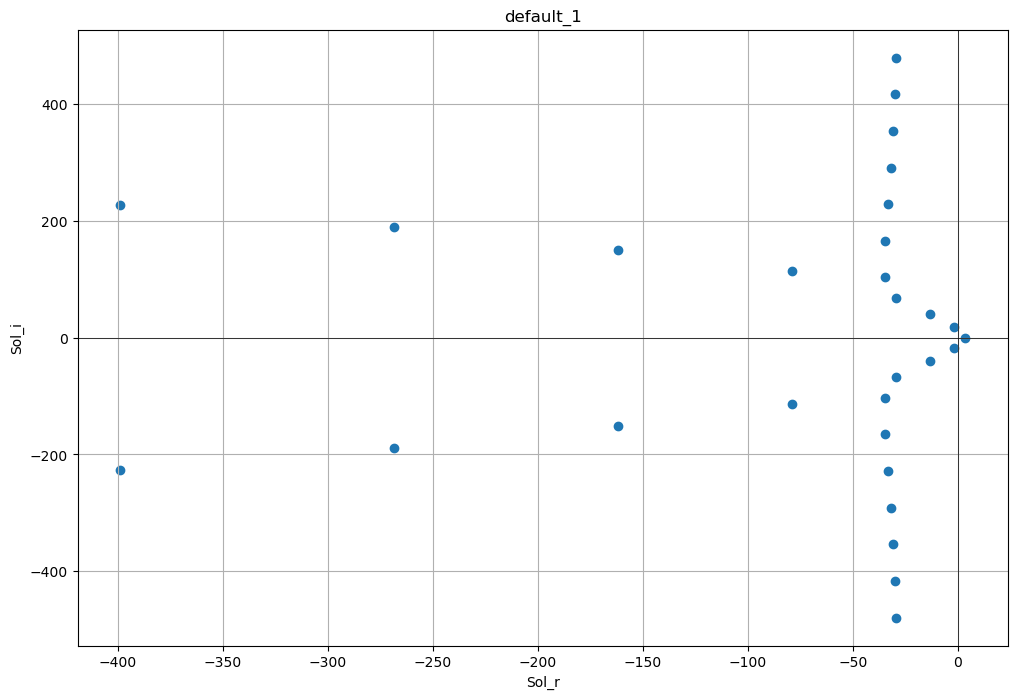

{'par': {'k': 5; 'D': 0.3; 'v': 3; 'tau': 0.1; 'R': 0.5; 'label': 'default'}; 'guess_range': ([-275; 25; 15]; [0; 500; 20]); 'tols': (1e-09; 0.05; 3)}


,Sol_r,Sol_i,Guess,g(x),ier,msg,infodict,instances
0,3.609,0.00,[-17.85714286 0. ],1.455192e-11,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-1.00000000e+00, ...",46
1,-1.606,17.65,[-17.85714286 26.31578947],9.761721e-11,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.94969779, -0.31...",4
2,-1.606,-17.65,[ -1.6056808 -17.65071346],9.761721e-11,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.94969779, 0.31...",4
3,-13.300,40.80,[-39.28571429 26.31578947],2.118791e-10,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.9029871 , -0.42...",7
4,-13.300,-40.80,[-13.30007156 -40.8031539 ],2.118791e-10,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.9029871 , 0.42...",7
5,-29.400,479.40,[-17.85714286 473.68421053],1.634284e-02,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.04840703, 0.99...",3
6,-29.400,-479.40,[ -29.4022831 -479.37318401],1.634284e-02,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.04840703, -0.99...",3
7,-29.480,67.83,[-17.85714286 78.94736842],1.746230e-10,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.9327918 , -0.36...",3
8,-29.480,-67.83,[-29.48245245 -67.83051303],1.746230e-10,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.9327918 , 0.36...",3
9,-30.100,-416.60,[ -30.10105588 -416.59181694],5.803156e-03,1,The solution converged.,"{'nfev': 4, 'fjac': array([[-0.97862943, -0.20...",3


In [6]:
df, label, metadata = plot_single_df(
        'CSV/default_1.csv', filter=False,
        real_lower_bound=-200, real_upper_bound=10, imag_lower_bound=-300, imag_upper_bound=300
)
display(df)

First, we define a handful of functions to ease the following tasks:

- Writing solution dataframes to csv files with corresponding parameters as their filename, which may also contain other data as their first line.
- Reading those csv files created above and saving them into a dataframe, with correct label ad metadata.
- Reading csv files containing different sets of parameters and saving them to a list of dictionaries, with each parameters set being a dictionary.
- clustering duplicate eigenvalues in the resulting dataframe using two methods:
    - Utilizing significant digits
    - Using HDBSCAN clustering method
- Plotting a single dataframe of solutions
- Plotting a series of solutions, each with diferent title (parameters set) to compare


It is necessary to define a function that gives the value of the characteristic equation at each $\lambda$. This can be later used in the main function, *find_eig()* to get a complete set of solutions. The charachteristic equiation is defined in the function *char_eq(x)*.

Now we may define a function to find the eigenvalues for the characteristic equation. This function takes the following optional keyword argument:

- par (dict): A dictionary containing parameters for the system's matrix. If not provided, keys may be passed separately. Absent keys will take default values.
- guess_single (complex): A single initial guess for eigenvalue calculation (real + imaginary part).
- guess_range_real (list): A list specifying the range of real parts of initial guess values.
- guess_range_imag (list): A list specifying the range of imaginary parts of initial guess values.
- tol_fsolve (float): Tolerance for fsolve array-like comaprison to converge.
- tol_is_sol (float): Tolerance for a complex solution to be accepted.
- round_sig_digits (float): Number of significant digits to either separate two different solutions or merge them as one.

It is designed to return a tuple with the following:

- solution_df (pandas.DataFrame): DataFrame containing found solutions' information.
- label (str): A label describing the customized parameters used for the computation.
- metadata (dict): A dictionary containing input arguments values used in the computation, other than the parameters.


# Eigenvalue Distribution Analysis

In this step, we want to evaluate system's eigenvalues. Furthermore, we are interested in the effects of system parameters on its eigenvalue distribution. First, we obtain the eigenvalue distribution for a system with default parameters, a.k.a. the default system:

In [ ]:
# Solve and plot for default_par
df, label, metadata = find_eig()

plot_single_df(df, label, metadata, filter=False)
print(df)

Now we change the default parameters and define new parameter sets to obtain new systems. Then we call the solver function using the customized parameter values to see how changing each parameter will affect the eigenvalue distribution of the system:

In [ ]:
pars_list = create_custom_pars_list('pars_list.csv')
for par in pars_list:
    df, label, metadata = find_eig(par=par)
    save_dataframe_to_csv(df, label, 'CSV', metadata)

In [ ]:
plot_multiple_datasets('CSV')